In [23]:
import numpy as np
import pandas as pd
import pingouin as pg
import scipy.stats as stats  
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv(r"C:\Users\DELL2025\Downloads\Compressed\healthcare_drug_efficacy.csv")
data.head()

,Patient_ID,Drug_A_Time,Drug_B_Time,Dosage_50mg,Dosage_100mg,Dosage_150mg
0,1,5,7,6,5,4
1,2,6,8,7,6,5
2,3,7,6,8,7,6
3,4,5,9,6,5,4
4,5,6,7,7,6,5


In [25]:
data.isna().sum()

Patient_ID      0
Drug_A_Time     0
Drug_B_Time     0
Dosage_50mg     0
Dosage_100mg    0
Dosage_150mg    0
dtype: int64

In [26]:
data.describe()

,Patient_ID,Drug_A_Time,Drug_B_Time,Dosage_50mg,Dosage_100mg,Dosage_150mg
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,6.250000,7.550000,6.500000,6.250000,5.250000
std,5.91608,1.069924,1.099043,0.945905,1.069924,1.069924
min,1.00000,5.000000,6.000000,5.000000,5.000000,4.000000
25%,5.75000,5.000000,7.000000,6.000000,5.000000,4.000000
50%,10.50000,6.000000,7.500000,6.500000,6.000000,5.000000
75%,15.25000,7.000000,8.250000,7.000000,7.000000,6.000000
max,20.00000,8.000000,9.000000,8.000000,8.000000,7.000000


In [27]:
#t-test
t_data = data[['Drug_A_Time', 'Drug_B_Time']]
t_data 

,Drug_A_Time,Drug_B_Time
0,5,7
1,6,8
2,7,6
3,5,9
4,6,7
5,8,8
6,7,7
7,6,9
8,5,6
9,7,8


In [28]:
# Shapiro-Wilk test for normality
shapiro_test_a = stats.shapiro(data['Drug_A_Time'])
shapiro_test_b = stats.shapiro(data['Drug_B_Time'])

print("Shapiro-Wilk Test for Drug_A_Time:", shapiro_test_a)
print("Shapiro-Wilk Test for Drug_B_Time:", shapiro_test_b)

# Kolmogorov-Smirnov test for normality
ks_test_a = stats.kstest(data['Drug_A_Time'], 'norm', args=(data['Drug_A_Time'].mean(), data['Drug_A_Time'].std()))
ks_test_b = stats.kstest(data['Drug_B_Time'], 'norm', args=(data['Drug_B_Time'].mean(), data['Drug_B_Time'].std()))

print("Kolmogorov-Smirnov Test for Drug_A_Time:", ks_test_a)
print("Kolmogorov-Smirnov Test for Drug_B_Time:", ks_test_b)


Shapiro-Wilk Test for Drug_A_Time: ShapiroResult(statistic=np.float64(0.8684526715903537), pvalue=np.float64(0.011037235306672099))
Shapiro-Wilk Test for Drug_B_Time: ShapiroResult(statistic=np.float64(0.87343492065864), pvalue=np.float64(0.013508497564207682))
Kolmogorov-Smirnov Test for Drug_A_Time: KstestResult(statistic=np.float64(0.19237611432581675), pvalue=np.float64(0.39898603031121804), statistic_location=np.int64(6), statistic_sign=np.int8(1))
Kolmogorov-Smirnov Test for Drug_B_Time: KstestResult(statistic=np.float64(0.19161578316012806), pvalue=np.float64(0.40379206781370647), statistic_location=np.int64(7), statistic_sign=np.int8(1))


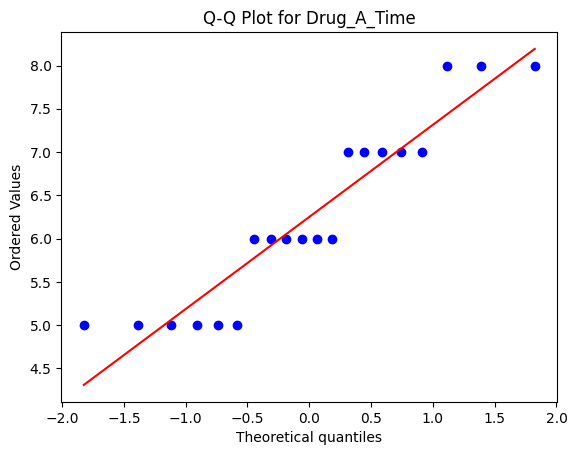

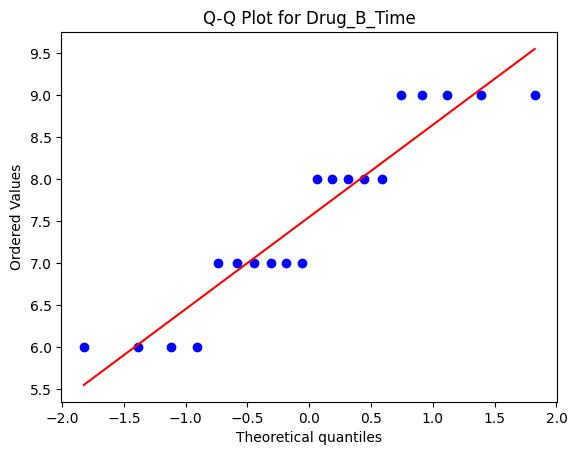

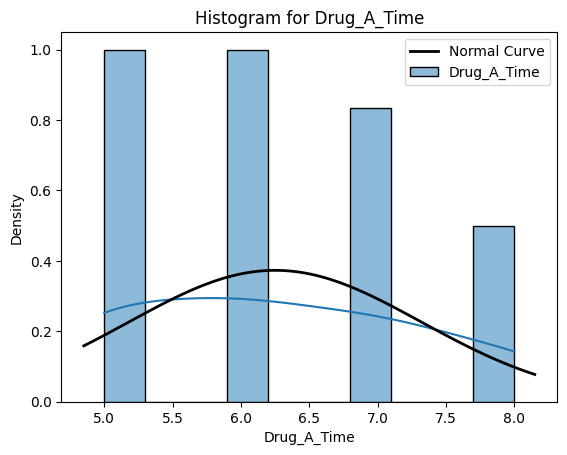

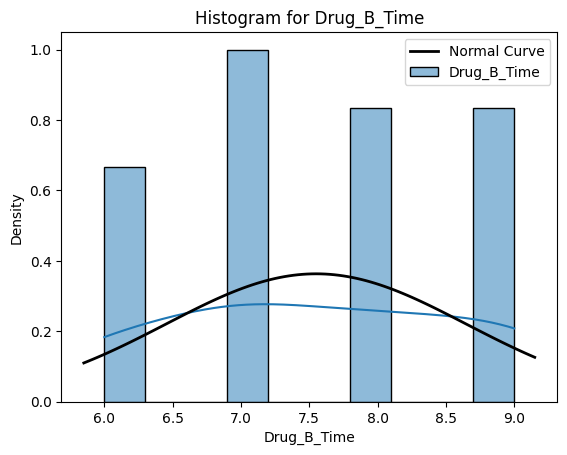

In [29]:
# Q-Q plot for Drug_A_Time
stats.probplot(data['Drug_A_Time'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Drug_A_Time")
plt.show()

# Q-Q plot for Drug_B_Time
stats.probplot(data['Drug_B_Time'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Drug_B_Time")
plt.show()

# Histogram with fitted normal distribution for Drug_A_Time
sns.histplot(data['Drug_A_Time'], kde=True, stat="density", bins=10, label="Drug_A_Time")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data['Drug_A_Time'].mean(), data['Drug_A_Time'].std())
plt.plot(x, p, 'k', linewidth=2, label="Normal Curve")
plt.title("Histogram for Drug_A_Time")
plt.legend()
plt.show()

# Histogram with fitted normal distribution for Drug_B_Time
sns.histplot(data['Drug_B_Time'], kde=True, stat="density", bins=10, label="Drug_B_Time")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data['Drug_B_Time'].mean(), data['Drug_B_Time'].std())
plt.plot(x, p, 'k', linewidth=2, label="Normal Curve")
plt.title("Histogram for Drug_B_Time")
plt.legend()
plt.show()

In [30]:
# The data is not normally distributed because the Shapiro-Wilk test and Kolmogorov-Smirnov test both yield p-values less than 0.05 for Drug_A_Time and Drug_B_Time, indicating a significant deviation from normality. Additionally, the Q-Q plots and histograms show deviations from a normal distribution.

In [31]:
# Use Wilcoxon
pg.wilcoxon(t_data['Drug_A_Time'], t_data['Drug_B_Time'])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,16.5,two-sided,0.003894,-0.784314,0.21125


In [32]:
alpha  = 0.05 
p_value = pg.wilcoxon(t_data['Drug_A_Time'], t_data['Drug_B_Time']).round(3)
actual_p_value = p_value['p-val'].iloc[0]  # Extract the actual p-value
print("P-value:", actual_p_value)
if alpha > actual_p_value:
    print("Reject the null hypothesis")
else:    
    print("Fail to reject the null hypothesis") 

P-value: 0.004
Reject the null hypothesis


 The p-value is less than 0.05, so we reject the null hypothesis. There is a significant difference between the Drug_A_Time and Drug_B_Time.

In [33]:

data_nova = data[['Dosage_50mg', 'Dosage_100mg', 'Dosage_150mg']]
data_nova

,Dosage_50mg,Dosage_100mg,Dosage_150mg
0,6,5,4
1,7,6,5
2,8,7,6
3,6,5,4
4,7,6,5
5,5,8,7
6,6,7,6
7,7,6,5
8,8,5,4
9,6,7,6


In [34]:
# Perform Shapiro-Wilk test for each column in data_nova
shapiro_results = {}
for column in data_nova.columns:
    shapiro_results[column] = stats.shapiro(data_nova[column])

# Print the results
for column, result in shapiro_results.items():
    print(f"Shapiro-Wilk Test for {column}: Statistic={result.statistic}, p-value={result.pvalue}")
    if result.pvalue > 0.05:
        print(f"{column} is normally distributed (p-value > 0.05).")
    else:
        print(f"{column} is not normally distributed (p-value <= 0.05).")

Shapiro-Wilk Test for Dosage_50mg: Statistic=0.8910239882912686, p-value=0.028084555296691918
Dosage_50mg is not normally distributed (p-value <= 0.05).
Shapiro-Wilk Test for Dosage_100mg: Statistic=0.8684526715903537, p-value=0.011037235306672099
Dosage_100mg is not normally distributed (p-value <= 0.05).
Shapiro-Wilk Test for Dosage_150mg: Statistic=0.8684526715903537, p-value=0.011037235306672099
Dosage_150mg is not normally distributed (p-value <= 0.05).


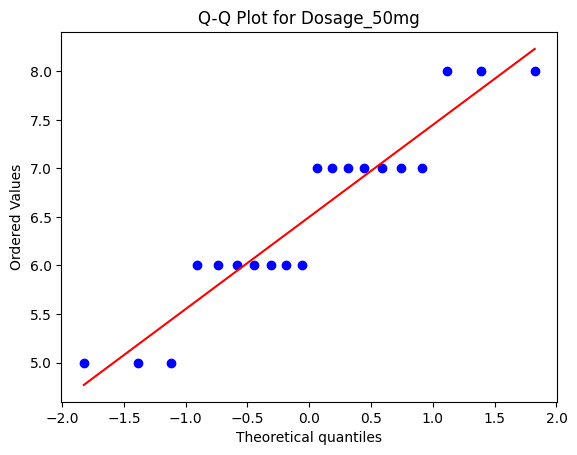

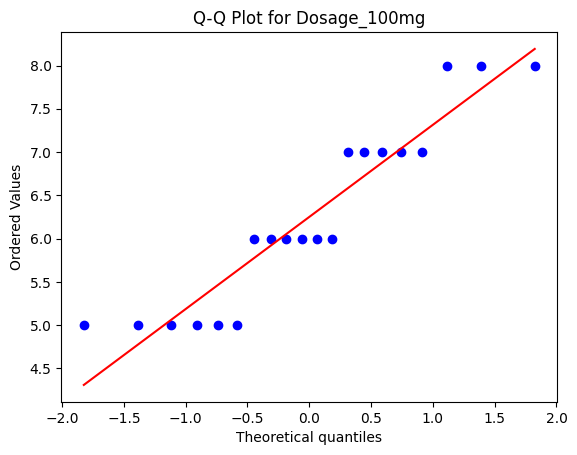

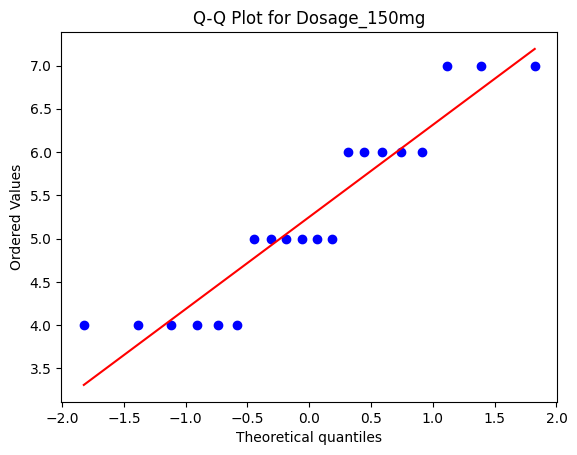

In [39]:
# Q-Q plot for each dosage
for column in data_nova.columns:
    stats.probplot(data_nova[column], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column}")
    plt.show()

not normally distributed 

In [35]:
mean_dose_50 = data_nova['Dosage_50mg'].mean()
mean_dose_100 = data_nova['Dosage_100mg'].mean()
mean_dose_150 = data_nova['Dosage_150mg'].mean()
sum_dose_50 = data_nova['Dosage_50mg'].sum()
sum_dose_100 = data_nova['Dosage_100mg'].sum()
sum_dose_150 = data_nova['Dosage_150mg'].sum()

print(mean_dose_50, mean_dose_100, mean_dose_150)
print(sum_dose_50, sum_dose_100, sum_dose_150)

6.5 6.25 5.25
130 125 105


In [36]:
data_n = data_nova.melt(var_name='Dosage', value_name='Time_days')
data_n.head()

,Dosage,Time_days
0,Dosage_50mg,6
1,Dosage_50mg,7
2,Dosage_50mg,8
3,Dosage_50mg,6
4,Dosage_50mg,7


In [37]:
# Perform kruskal-wallis test
pg.kruskal(data=data_n, dv='Time_days', between='Dosage')

,Source,ddof1,H,p-unc
Kruskal,Dosage,2,12.295198,0.002139


In [38]:
alpha = 0.05
p_value = pg.kruskal(data=data_n, dv='Time_days', between='Dosage').round(3)
actual_p_value = p_value['p-unc'].iloc[0]  # Extract the actual p-value
if actual_p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
